In [123]:
! pip install pyspark

In [124]:
import seaborn as sns
import pyspark.sql.functions
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# Using PySpark, perform data analysis on the ‘mpg’ dataset from seaborn
# Find the following information using PySpark’s DataFrame methods, or using Pandas on Spark

In [137]:
mpg = sns.load_dataset('mpg')
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


# Find the cars with the highest and lowest mpg

In [140]:
hmpg = mpg.max()
lmpg = mpg.min()
print("Cars with the highest mpg :\n",hmpg)
print("\n")
print("Cars with the lowest mpg :\n",lmpg)

Cars with the highest mpg :
 mpg                         46.6
cylinders                      8
displacement               455.0
horsepower                 230.0
weight                      5140
acceleration                24.8
model_year                    82
origin                       usa
name            vw rabbit custom
dtype: object


Cars with the lowest mpg :
 mpg                                 9.0
cylinders                             3
displacement                       68.0
horsepower                         46.0
weight                             1613
acceleration                        8.0
model_year                           70
origin                           europe
name            amc ambassador brougham
dtype: object


# Find the cars with the highest and lowest mpg in their release decade

In [141]:
hmpgrd = mpg.groupby("model_year").max("mpg")
lmpgrd = mpg.groupby("model_year").min("mpg")
print("Cars with the highest mpg in their release decade :\n",hmpgrd)
print("\n")
print("Cars with the lowest mpg in their release decade :\n",lmpgrd)

Cars with the highest mpg in their release decade :
              mpg  cylinders  displacement  horsepower  weight  acceleration
model_year                                                                 
70          27.0          8         455.0       225.0    4732          20.5
71          35.0          8         400.0       180.0    5140          20.5
72          28.0          8         429.0       208.0    4633          23.5
73          29.0          8         455.0       230.0    4997          21.0
74          32.0          8         350.0       150.0    4699          21.0
75          33.0          8         400.0       170.0    4668          21.0
76          33.0          8         351.0       180.0    4380          22.2
77          36.0          8         400.0       190.0    4335          19.0
78          43.1          8         318.0       165.0    4080          21.5
79          37.3          8         360.0       155.0    4360          24.8
80          46.6          6        

# Find the average weight per country of origin

In [142]:
mpg[["origin","weight"]].groupby("origin").mean("weight")

,weight
origin,
europe,2423.300000
japan,2221.227848
usa,3361.931727


# Find the average mpg per cylinder count

In [143]:
mpg[["cylinders","mpg"]].groupby("cylinders").mean("mpg")

,mpg
cylinders,
3,20.550000
4,29.286765
5,27.366667
6,19.985714
8,14.963107


# Find the average mpg per country of origin and release year

In [144]:
mpg[["origin","model_year","mpg"]].groupby(["origin","model_year"]).mean("mpg")

mpg
origin model_year           
europe 70          25.200000
       71          28.750000
       72          22.000000
       73          24.000000
       74          27.000000
       75          24.500000
       76          24.250000
       77          29.250000
       78          24.950000
       79          30.450000
       80          37.288889
       81          31.575000
       82          40.000000
japan  70          25.500000
       71          29.500000
       72          24.200000
       73          20.000000
       74          29.333333
       75          27.500000
       76          28.000000
       77          27.416667
       78          29.687500
       79          32.950000
       80          35.400000
       81          32.958333
       82          34.888889
usa    70          15.272727
       71          18.100000
       72          16.277778
       73          15.034483
       74          18.333333
       75          17.550000
       76          19.431818
       77          20.722222
       78          21.772727
       79          23.478261
       80          25.914286
       81          27.530769
       82          29.450000

# What is the correlation between mpg and release year?

In [145]:
mpg[['mpg','model_year']].corr()

,mpg,model_year
mpg,1.000000,0.579267
model_year,0.579267,1.000000


# what is the relationship between cylinder and horsepower?

In [146]:
dfch1=mpg[['cylinders','horsepower']]
dfch2=dfch1.dropna()
print(str(dfch1.shape))
print(str(dfch2.shape))

(398, 2)
(392, 2)


In [147]:
dfch2=dfch2.sort_values('horsepower')

In [148]:
x=dfch2['cylinders'].values
y=dfch2['horsepower'].values
np.mean(y)

104.46938775510205

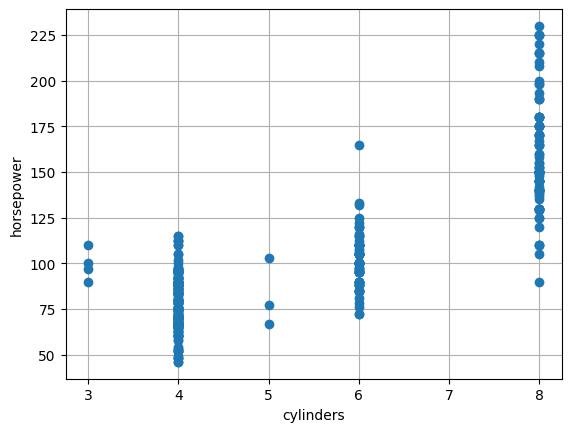

In [149]:
plt.plot(x,y,'o')
plt.xlabel('cylinders')
plt.ylabel('horsepower')
plt.grid(True)

# what is the relationship between cylinder and acceleration?

In [150]:
dfca=mpg[['cylinders','acceleration']]
print(str(dfca.shape))

(398, 2)


In [151]:
dfca=dfca.sort_values('acceleration')

In [152]:
x=dfca['cylinders'].values
y=dfca['acceleration'].values
np.mean(y)

15.568090452261307

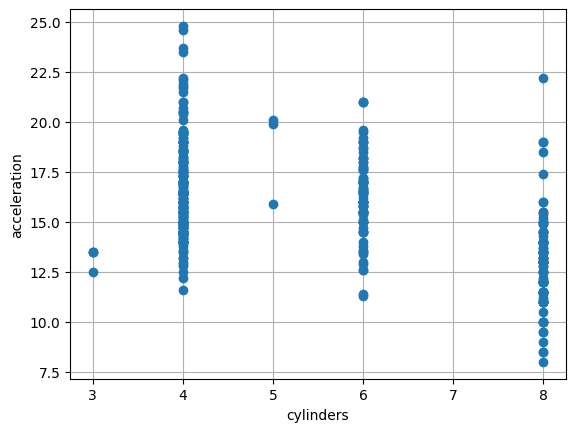

In [153]:
plt.plot(x,y,'o')
plt.xlabel('cylinders')
plt.ylabel('acceleration')
plt.grid(True)

# what other factors correlate with acceleration?

In [154]:
df_c=mpg['name'].astype('category')
df_c=mpg['origin'].astype('category')

In [157]:
mpg['name']=df_c.cat.codes
mpg['name']

0      2
1      2
2      2
3      2
4      2
      ..
393    2
394    0
395    2
396    2
397    2
Name: name, Length: 398, dtype: int8

In [155]:
mpg['origin']=df_c.cat.codes
mpg['origin']

0      2
1      2
2      2
3      2
4      2
      ..
393    2
394    0
395    2
396    2
397    2
Name: origin, Length: 398, dtype: int8

In [158]:
mpg = mpg.replace(np.nan, 0)
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,2,2
1,15.0,8,350.0,165.0,3693,11.5,70,2,2
2,18.0,8,318.0,150.0,3436,11.0,70,2,2
3,16.0,8,304.0,150.0,3433,12.0,70,2,2
4,17.0,8,302.0,140.0,3449,10.5,70,2,2
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,2,2
394,44.0,4,97.0,52.0,2130,24.6,82,0,0
395,32.0,4,135.0,84.0,2295,11.6,82,2,2
396,28.0,4,120.0,79.0,2625,18.6,82,2,2


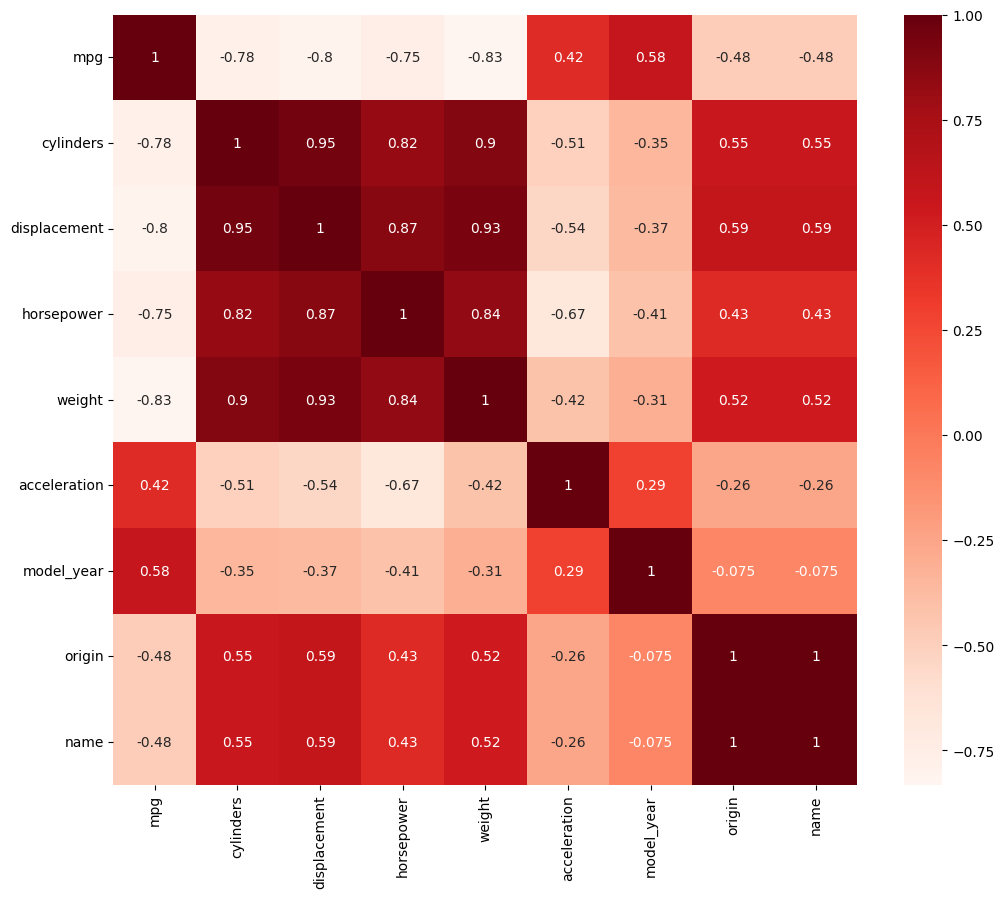

In [159]:
plt.figure(figsize=(12,10))
cor = mpg.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()